In [5]:
# Mounting the google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt

In [7]:
training_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.4,
                                    height_shift_range=0.4
                             )
training_set = training_datagen.flow_from_directory(
                                    directory='/content/drive/MyDrive/beauty classification/train',
                                    batch_size=32,
                                    target_size=(64,64),
                                    class_mode='binary'
)

Found 4000 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
                                    directory='/content/drive/MyDrive/beauty classification/test',
                                    batch_size=32,
                                    target_size=(64,64),
                                    class_mode='binary'
)

Found 300 images belonging to 2 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(
                                    directory='/content/drive/MyDrive/beauty classification/valid',
                                    batch_size=32,
                                    target_size=(64,64),
                                    class_mode='binary'
)

Found 300 images belonging to 2 classes.


In [10]:
cnn = Sequential()

In [11]:
cnn.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3)))
cnn.add(MaxPooling2D(pool_size=2))

In [12]:
cnn.add(Conv2D(filters=64,kernel_size=(3,3)))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(0.2))

In [13]:
cnn.add(Conv2D(filters=128,kernel_size=3))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(0.2))

In [14]:
cnn.add(Conv2D(filters=256,kernel_size=3))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(0.3))

In [15]:
cnn.add(Flatten())

In [16]:
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.3))

In [17]:
cnn.add(Dense(units=1,activation='sigmoid'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       7

In [19]:
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
r = cnn.fit(x=training_set,validation_data=validation_set,epochs=50,batch_size=32)

Epoch 1/50
125/125 [==============================] - 884s 7s/step - loss: 0.6705 - accuracy: 0.5870 - val_loss: 0.5927 - val_accuracy: 0.7233
Epoch 2/50
125/125 [==============================] - 14s 115ms/step - loss: 0.6499 - accuracy: 0.6143 - val_loss: 0.6287 - val_accuracy: 0.5800
Epoch 3/50
125/125 [==============================] - 14s 115ms/step - loss: 0.6320 - accuracy: 0.6410 - val_loss: 0.5970 - val_accuracy: 0.7033
Epoch 4/50
125/125 [==============================] - 14s 114ms/step - loss: 0.6082 - accuracy: 0.6653 - val_loss: 0.4799 - val_accuracy: 0.7933
Epoch 5/50
125/125 [==============================] - 14s 115ms/step - loss: 0.5641 - accuracy: 0.7153 - val_loss: 0.4835 - val_accuracy: 0.7833
Epoch 6/50
125/125 [==============================] - 15s 118ms/step - loss: 0.5175 - accuracy: 0.7570 - val_loss: 0.4473 - val_accuracy: 0.8333
Epoch 7/50
125/125 [==============================] - 14s 115ms/step - loss: 0.4663 - accuracy: 0.7815 - val_loss: 0.4082 - val_accu

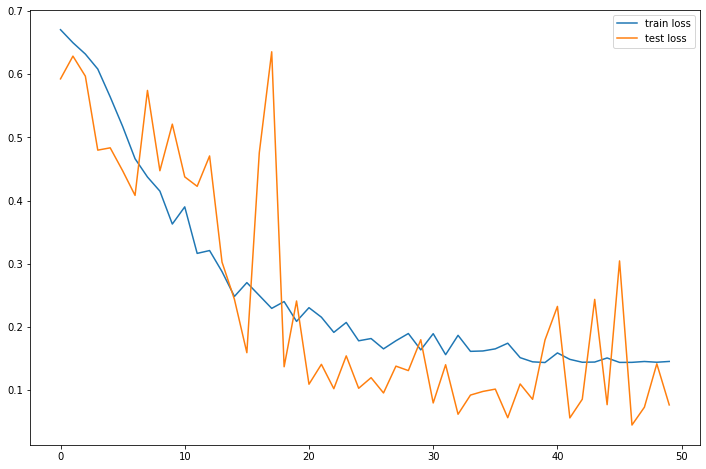

In [21]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

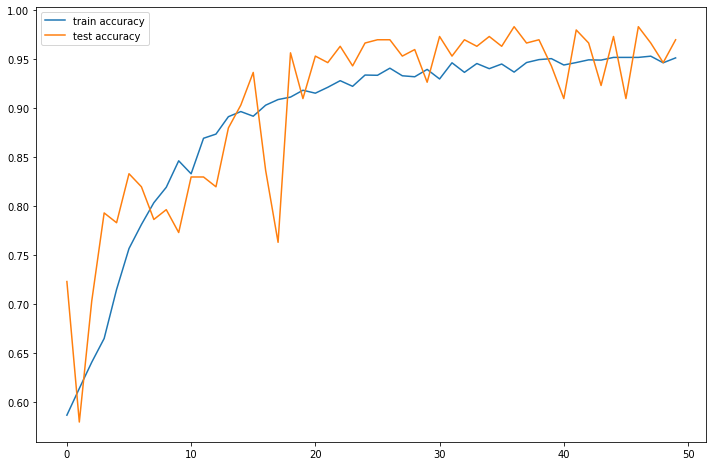

In [22]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='test accuracy')
plt.legend();